<a href="https://colab.research.google.com/github/Alfonso-Jesus-Garcia-Moya/RECONOCIMIENTO-DE-FORMAS-Y-APRENDIZAJE-COMPUTACIONAL/blob/main/SEMANA%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEMANA 7
Tema 3 APRENDIZAJE NO SUPERVISADO.

3.4. Reducción de dimensionalidad. PCA y t-SNE.

3.5. Análisis de componentes independientes.

3.6. Reglas de asociación.

Objetivo:

Comprender las principales técnicas de reducción de dimensionalidad (PCA, t-SNE, ICA) y su papel en la simplificación y visualización de datos sin etiquetas, así como el uso de reglas de asociación para descubrir patrones frecuentes en conjuntos de datos. Además, desarrollar la capacidad de aplicar estas herramientas de manera crítica y responsable, reconociendo sus aplicaciones prácticas y limitaciones.

In [ ]:
!pip install umap-learn --quiet
!pip install mlxtend --quiet

import umap.umap_ as umap
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Tema 3: Aprendizaje no supervisado

---

## 3.4. Reducción de dimensionalidad: PCA y t-SNE

### ¿Qué es la reducción de dimensionalidad?
- Proceso de simplificar un dataset con muchas variables, manteniendo la mayor parte de la información relevante.
- Ayuda a:
  - Evitar la "maldición de la dimensionalidad".
  - Mejorar la eficiencia de algoritmos.
  - Facilitar la **visualización** en 2D o 3D.



### PCA (Principal Component Analysis)
- Método lineal que busca **maximizar la varianza** en nuevas variables llamadas **componentes principales**.
- Cada componente es una combinación lineal de las variables originales.
- Permite conocer cuánta varianza explica cada componente.

### t-SNE (t-distributed Stochastic Neighbor Embedding)
- Método no lineal usado principalmente para **visualización**.
- Conserva **relaciones locales** (puntos cercanos en el espacio original permanecen cercanos en la proyección 2D/3D).
- Muy útil en datasets de alta dimensión como imágenes o texto.

📌 **Mensaje clave:** PCA simplifica datos linealmente, t-SNE ofrece proyecciones más realistas para visualizar estructuras complejas.

---




# 3.4. Reducción de dimensionalidad — PCA en la práctica

El PCA permite reducir el número de variables de un dataset **manteniendo la mayor parte de la información**.  
Nos ayuda a:
- Visualizar datos en 2D/3D.
- Quitar redundancia (variables muy correlacionadas).
- Acelerar otros algoritmos.

En este ejemplo lo aplicamos al dataset **Iris**.


In [ ]:
# ============================================
# 1) Dataset Iris + escalado
# ============================================
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
feature_names = iris.feature_names

print("Shape:", X.shape)
display(X.head())

# Escalamos las variables (media=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Mapa de Correlación y Tipos de Correlación

### ¿Qué es un mapa de correlación?
Un **mapa de correlación** es una representación visual que muestra las relaciones entre las variables de un conjunto de datos.  
La **correlación** mide la **fuerza y dirección** de la relación entre dos variables.

---

### Tipos de Correlación:
1. **Correlación positiva**:  
   Cuando una variable aumenta, la otra también aumenta.  
   Ejemplo: `Altura` vs. `Peso` en muchos casos.

2. **Correlación negativa**:  
   Cuando una variable aumenta, la otra disminuye.  
   Ejemplo: `Velocidad de un coche` vs. `Tiempo de llegada a un destino` (si todo lo demás es constante).

3. **Correlación nula (cero)**:  
   No hay una relación lineal clara entre las variables.  
   Ejemplo: `Color de camiseta` vs. `Peso corporal` (probablemente no correlacionadas).

---

## Generación del Mapa de Correlación
Para crear el mapa de correlación, usamos la **matriz de correlación** que calcula la relación lineal entre cada par de variables en el dataset.


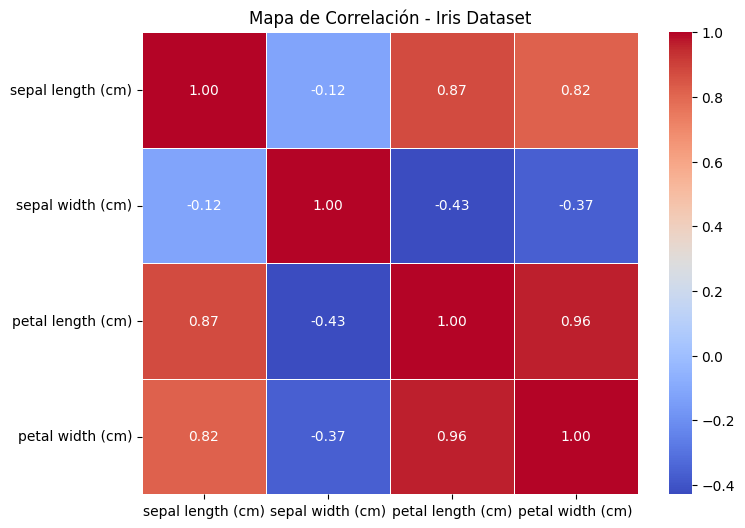

In [ ]:
import seaborn as sns
# ============================================
# 2) Calcular la matriz de correlación
# ============================================
correlation_matrix = pd.DataFrame(X_scaled, columns=feature_names).corr()

# Mapa de correlación usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación - Iris Dataset")
plt.show()


# Tipos de Correlación

## 1. **Correlación de Pearson**
- **¿Qué es?**  
  La **correlación de Pearson** mide la **relación lineal** entre dos variables continuas.
- **Rango:** De -1 a 1.  
  - **1** indica una relación **lineal positiva perfecta**.
  - **-1** indica una relación **lineal negativa perfecta**.
  - **0** indica **ausencia de relación lineal**.
- **Requisitos:** Las variables deben ser **normales** (distribuidas de manera normal).

## 2. **Correlación de Spearman**
- **¿Qué es?**  
  La **correlación de Spearman** es una **medida no paramétrica** que evalúa la relación entre dos variables, pero en lugar de trabajar con los valores originales, utiliza sus **rangos**. Es útil para datos **ordinales** o cuando las variables no tienen una relación lineal.
- **Rango:** De -1 a 1.  
  - **1** indica una relación **monótonamente creciente** perfecta.
  - **-1** indica una relación **monótonamente decreciente** perfecta.
  - **0** indica **ausencia de relación monotónica**.

## 3. **Correlación de Kendall (Tau de Kendall)**
- **¿Qué es?**  
  La **correlación de Kendall** también es una medida **no paramétrica** que mide la relación entre dos variables mediante el número de concordancias y discordancias en los rangos de los datos.
- **Rango:** De -1 a 1.  
  - **1** indica **concordancia perfecta** (todos los pares de observaciones se mueven de manera similar).
  - **-1** indica **discordancia perfecta** (todos los pares de observaciones se mueven en direcciones opuestas).
  - **0** indica **ausencia de relación**.

---

## ¿Cuándo usar cada uno?
- **Pearson**: cuando las variables son **continuas** y tienen una relación lineal.
- **Spearman**: cuando las variables son **ordinales** o cuando no puedes asumir una relación lineal.
- **Kendall**: cuando tienes un **conjunto pequeño de datos** y prefieres la robustez a la influencia de valores atípicos.

---



## ¿Cómo elegir el número de componentes $k$?
- **Umbral de varianza acumulada**: elegir el menor $k$ tal que EVR acumulada ≥ **90–95%** (contexto-dependiente).  
- **Scree plot (codo)**: graficar $\lambda_i$ o EVR; elegir donde la curva “deja de mejorar” claramente.  
- **Criterio de Kaiser**: (solo si usas **correlación/estandarización**) conservar PCs con $\lambda_i > 1$.  
- **Validación por tarea**: si PCA es paso previo a un modelo, elegir $k$ que **maximiza desempeño** (con CV, sin fuga de datos).


## Varianza explicada por componentes

Cada **componente principal** captura una fracción de la **varianza** del dataset.  
La suma acumulada nos indica cuántas dimensiones necesitamos conservar.


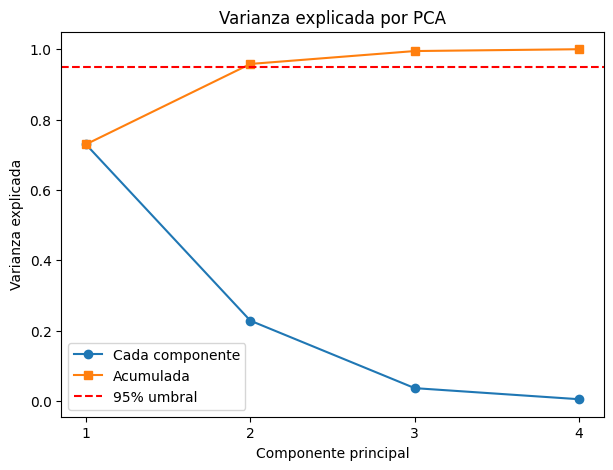

In [ ]:
# ============================================
# 2) PCA y varianza explicada
# ============================================
from sklearn.decomposition import PCA
import numpy as np

# PCA con tantas componentes como variables
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por componente
evr = pca.explained_variance_ratio_  # explained_variance_ratio_ nos dice cuánta varianza captura cada componente
cum_evr = np.cumsum(evr)  # Acumulamos la varianza explicada para ver el porcentaje total

# Gráfico
plt.figure(figsize=(7,5))
plt.plot(range(1, len(evr)+1), evr, marker='o', label="Cada componente")
plt.plot(range(1, len(cum_evr)+1), cum_evr, marker='s', label="Acumulada")
plt.axhline(0.95, color="red", linestyle="--", label="95% umbral")
plt.xticks(range(1, len(evr)+1))
plt.xlabel("Componente principal")
plt.ylabel("Varianza explicada")
plt.title("Varianza explicada por PCA")
plt.legend()
plt.show()


👉 Interpretación:  
- La **Componente 1** explica la mayor parte de la variabilidad.  
- Con **2 componentes** ya se captura más del **95%** de la información.  


## Gráficas en 2D (PCA)

Reducimos el dataset a 2 dimensiones para **graficar los clusters** de Iris.


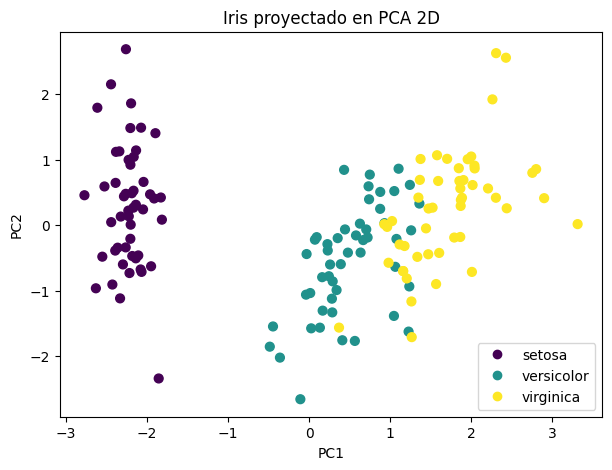

In [ ]:
# ============================================
# 3) Proyección PCA a 2D
# ============================================
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
scatter = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap="viridis", s=40)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("Iris proyectado en PCA 2D")

# Convertimos target_names a lista
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist())
plt.show()


## Loadings (qué variables influyen en cada PC)

Los *loadings* muestran cuánto aporta cada variable original a cada componente.


In [ ]:
# ============================================
# 4) Loadings de las variables
# ============================================
loadings = pd.DataFrame(
    pca2.components_.T,
    columns=["PC1", "PC2"],
    index=feature_names
)
display(loadings.round(3))


,PC1,PC2
sepal length (cm),0.521,0.377
sepal width (cm),-0.269,0.923
petal length (cm),0.580,0.024
petal width (cm),0.565,0.067


- Sirve para dar **significado a los ejes** de la proyección.  


# Biplot PCA — Visualización e interpretación

Un **biplot de PCA** combina dos tipos de información en un mismo gráfico:

1. **Proyección de las observaciones (puntos):**  
   Cada muestra se representa en el plano formado por las dos primeras **componentes principales (PC1 y PC2)**.  
   - Los puntos cercanos entre sí indican que comparten características similares.  
   - Colorear por clase (si existe) ayuda a ver cómo el PCA separa los grupos.

2. **Vectores de variables (flechas):**  
   Representan la contribución de cada variable original a las componentes principales.  
   - **Dirección:** indica hacia qué parte del plano “empuja” la variable.  
   - **Longitud:** refleja la importancia relativa de la variable en la varianza explicada.  
   - Variables que apuntan en una dirección similar están **correlacionadas**.  
   - Si apuntan en direcciones opuestas, suelen estar **negativamente correlacionadas**.

---

## ¿Para qué sirve un biplot?
- **Interpretación de PCs:** permite entender qué variables influyen en cada componente.  
- **Exploración de patrones:** facilita ver cómo se agrupan los datos y qué características explican la separación.  
- **Comunicación visual:** combina **datos y variables** en un mismo gráfico, útil en informes y clases.  

---

👉 Ejemplo con Iris:
- PC1 concentra la mayor parte de la varianza.  
- Las flechas muestran que **petal length** y **petal width** son las variables que más aportan a la separación entre especies.  
- **setosa** queda claramente separada, mientras que *versicolor* y *virginica* se superponen parcialmente.


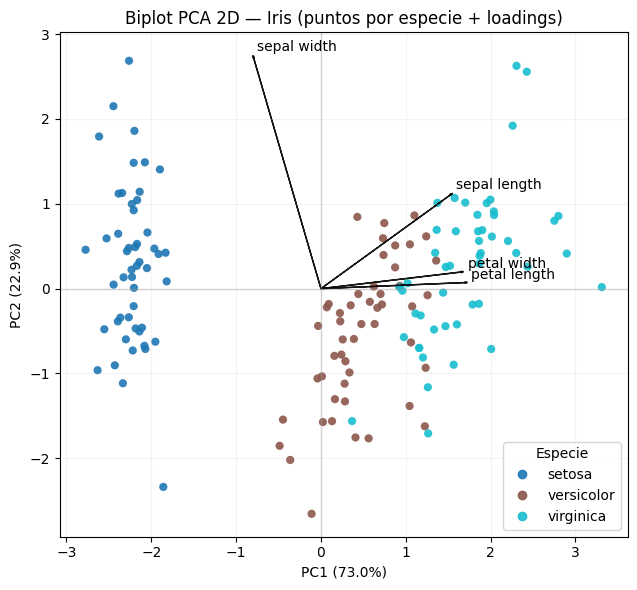

In [ ]:
# ============================================
# BIPLOT PCA 2D (puntos + flechas de loadings)
# ============================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) Datos + escalado
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
names = iris.target_names.tolist()
feature_names = iris.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) PCA a 2 componentes
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_scaled)

evr = pca2.explained_variance_ratio_
pc1_pct = f"{evr[0]*100:.1f}%"
pc2_pct = f"{evr[1]*100:.1f}%"

# 3) Loadings (dirección de cada variable en el espacio PC)
#    Usamos componentes y escalamos para que se vean bien sobre el scatter.
#    (Hay varias convenciones; aquí priorizamos claridad visual del gráfico)
loadings = pca2.components_.T   # shape: (n_features, 2)

# Escala de flechas: adaptativa al rango del scatter
scale = 0.9 * np.max(np.abs(X_pca2))   # factor base según dispersión
arrow_scale = scale  # puedes ajustar (ej. 0.8*scale, 1.2*scale) si quieres más/menos largos

# 4) Plot
plt.figure(figsize=(8,6))

# Puntos coloreados por especie
scatter = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap="tab10", s=35, alpha=0.9, edgecolor="none")

# Flechas de loadings desde el origen
for i, var in enumerate(feature_names):
    x_vec = loadings[i,0] * arrow_scale
    y_vec = loadings[i,1] * arrow_scale
    # flecha
    plt.arrow(0, 0, x_vec, y_vec,
              color="black", alpha=0.9, width=0.0015, head_width=0.02,
              length_includes_head=True)
    # etiqueta al final de la flecha
    offset = 0.015 * scale
    plt.text(x_vec + offset, y_vec + offset, var.replace(" (cm)", ""),
             fontsize=10, color="black")

# Estética
plt.axhline(0, color="#999999", linewidth=1, alpha=0.4)
plt.axvline(0, color="#999999", linewidth=1, alpha=0.4)
plt.xlabel(f"PC1 ({pc1_pct})")
plt.ylabel(f"PC2 ({pc2_pct})")
plt.title("Biplot PCA 2D — Iris (puntos por especie + loadings)")
plt.legend(handles=scatter.legend_elements()[0], labels=names, title="Especie")
plt.gca().set_aspect('equal', 'box')
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()


# 3.4. Reducción de dimensionalidad — t-SNE

## ¿Qué es t-SNE?
El **t-SNE** es un algoritmo de reducción de dimensionalidad **no lineal** orientado a **visualización**.  
Su objetivo es **preservar las vecindades locales**: puntos cercanos en el espacio original deben seguir siendo cercanos en el espacio reducido.

### Características principales:
- Útil para **graficar datasets complejos en 2D o 3D**.  
- Captura **patrones locales** que PCA (lineal) no siempre detecta.  
- No genera una transformación reutilizable → solo sirve para el dataset actual.  
- Sensible a parámetros (ej. *perplexity*).  

---

## Hiperparámetros clave:
- **perplexity:** mide “cuántos vecinos considerar” (suele probarse entre 5 y 50).  
- **learning_rate:** controla la velocidad de ajuste (ej. 200 es estándar).  
- **n_iter:** número de iteraciones (≥ 500 recomendado; 1000+ para estabilidad).  

---


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


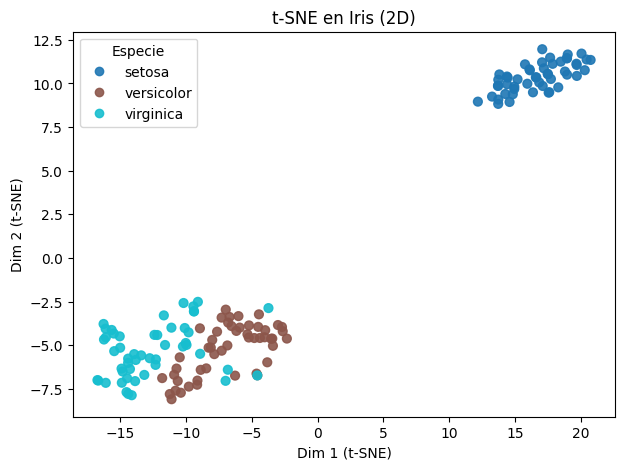

In [ ]:
# ============================================
# t-SNE en Iris (2D)
# ============================================
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reducir de 4D -> 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200,
            n_iter=1000, random_state=42)

X_tsne = tsne.fit_transform(X_scaled)

# Visualización
plt.figure(figsize=(7,5))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="tab10", s=40, alpha=0.9)
plt.title("t-SNE en Iris (2D)")
plt.xlabel("Dim 1 (t-SNE)"); plt.ylabel("Dim 2 (t-SNE)")
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist(), title="Especie")
plt.show()


## Interpretación
- A diferencia de PCA, aquí los **clusters** suelen aparecer más separados.  
- **No hay varianza explicada**: las escalas de los ejes no significan lo mismo que en PCA.  
- Ideal para **explorar estructura de los datos** y ver **agrupamientos naturales**.  
- Recomendado: probar varios valores de `perplexity` y `learning_rate` para ver estabilidad.  

---

## Buenas prácticas
- Escalar datos antes de aplicar t-SNE.  
- Usar primero **PCA → t-SNE** en datasets de muchas variables (ej. reducir a 30 PCs con PCA, luego aplicar t-SNE).  
- No interpretar distancias absolutas entre clusters, sino la **separación relativa**.  


## t-SNE 3D — Visualización no lineal

- **Objetivo:** preservar **vecindades locales** y visualizar la estructura del dataset en **3D**.  
- **Parámetros clave:** `perplexity` (vecinos efectivos), `learning_rate`, `n_iter`.  
- **Buenas prácticas:** escalar datos; en alta dimensión, usar primero **PCA → t-SNE**.  
- **Nota:** los ejes de t-SNE **no** tienen interpretación como “varianza explicada”.


In [ ]:
poner el 3D

# 3.4. Reducción de dimensionalidad — UMAP

## ¿Qué es UMAP?
El **UMAP** es una técnica de reducción de dimensionalidad **no lineal** basada en teoría de grafos y geometría diferencial.

### Características principales:
- Similar a t-SNE en la idea de preservar **vecindades locales**.  
- Mucho más **rápido y escalable** en datasets grandes.  
- Permite definir el número de dimensiones de salida (2D, 3D, etc.).  
- A diferencia de t-SNE, **sí permite transformar nuevos datos** con `.transform()`.

---

## Hiperparámetros clave:
- **n_neighbors:** controla el tamaño del vecindario local (balance entre estructura local y global).  
  - Valores bajos → más detalle local.  
  - Valores altos → más estructura global.  
- **min_dist:** controla qué tan juntos se colocan los puntos en el espacio reducido.  
- **n_components:** número de dimensiones de salida (2D, 3D, etc.).  


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


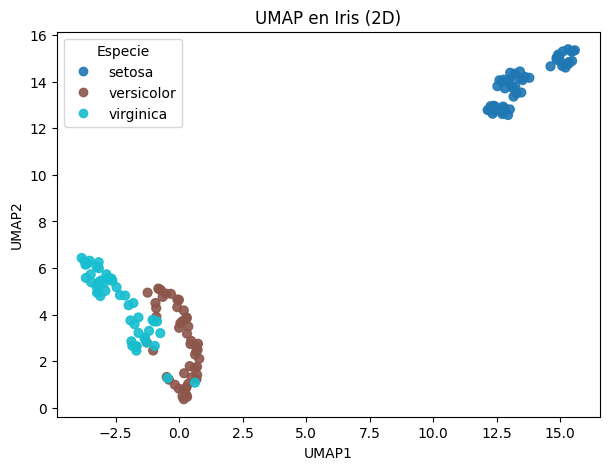

In [ ]:
# ============================================
# UMAP en Iris (2D)
# ============================================
import matplotlib.pyplot as plt

# Reducir de 4D -> 2D
umap2d = umap.UMAP(
    random_state=42
)
X_umap2 = umap2d.fit_transform(X_scaled)

# Graficación
plt.figure(figsize=(7,5))
scatter = plt.scatter(X_umap2[:,0], X_umap2[:,1], c=y, cmap="tab10", s=40, alpha=0.9)
plt.title("UMAP en Iris (2D)")
plt.xlabel("UMAP1"); plt.ylabel("UMAP2")
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist(), title="Especie")
plt.show()


## Comparación rápida: PCA vs t-SNE vs UMAP
- **PCA:** lineal, rápido, útil para preprocesar y explicar varianza global.  
- **t-SNE:** preserva vecindades locales, muy bueno para gráficar clusters pequeños, pero lento y no reutilizable.  
- **UMAP:** balance entre local y global, rápido, escalable y **sí se puede aplicar a nuevos datos**.  

👉 En la práctica, muchos pipelines usan **PCA → UMAP** para mejorar rendimiento y estabilidad.


# 3.5. Análisis de Componentes Independientes (ICA)

## ¿Qué es ICA?
El **ICA** busca descomponer un conjunto de señales en **componentes estadísticamente independientes**.  
Se usa cuando queremos identificar **fuentes ocultas** a partir de **mezclas observadas**.  

### Diferencia con PCA:
- **PCA**: maximiza la **varianza explicada** y produce componentes no correlacionados (pero no necesariamente independientes).  
- **ICA**: busca maximizar la **independencia estadística** (usando medidas como *kurtosis* o *entropía*).  
- Muy útil para problemas de **señales** (audio, EEG, fMRI, etc.).

---

## Aplicaciones típicas:
- **Separación de señales**: el famoso problema del “cóctel” (distinguir voces mezcladas).  
- **Neurociencia**: identificar patrones independientes en datos de EEG o imágenes cerebrales.  
- **Visión por computadora**: extraer características independientes de imágenes.  

---


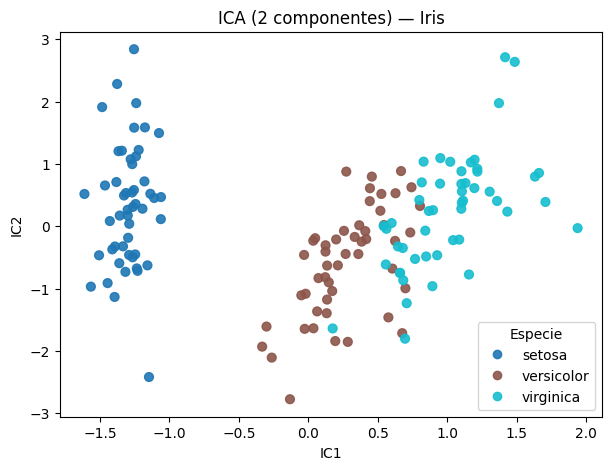

In [ ]:
# ============================================
# Ejemplo de ICA con Iris
# ============================================
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# ICA con 2 componentes
ica = FastICA(n_components=2, random_state=42, max_iter=10000)
X_ica2 = ica.fit_transform(X_scaled)

# Visualización
plt.figure(figsize=(7,5))
scatter = plt.scatter(X_ica2[:,0], X_ica2[:,1], c=y, cmap="tab10", s=40, alpha=0.9)
plt.xlabel("IC1"); plt.ylabel("IC2")
plt.title("ICA (2 componentes) — Iris")
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist(), title="Especie")
plt.show()


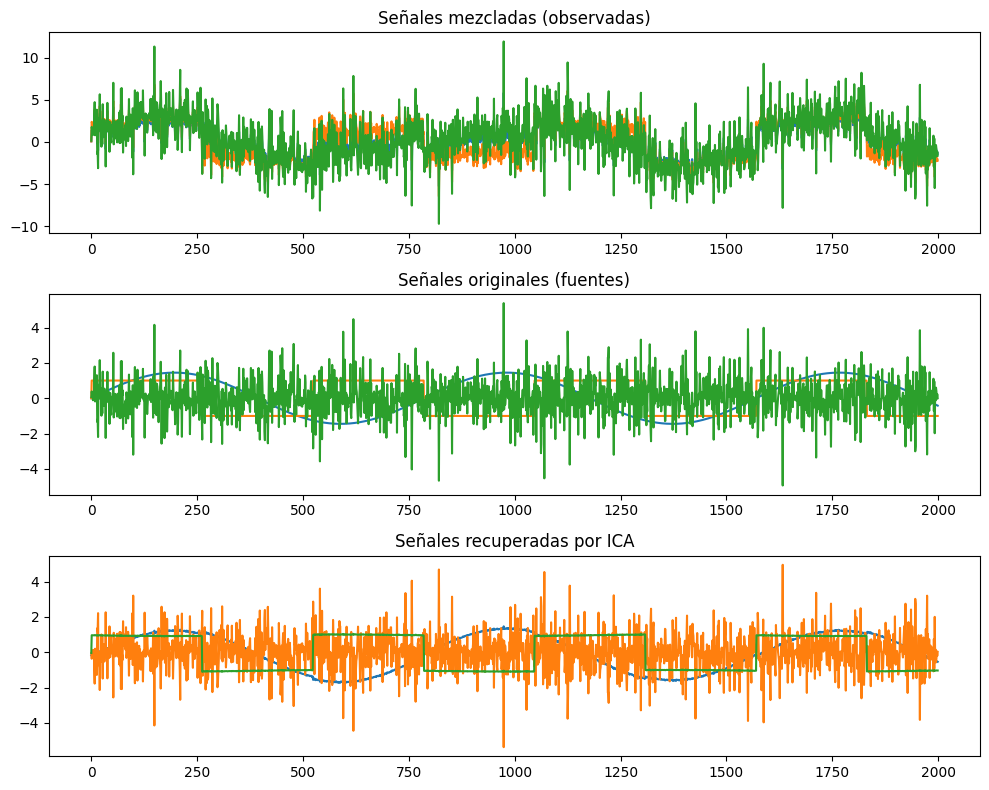

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Crear señales independientes (fuentes verdaderas)
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)         # Señal sinusoidal
s2 = np.sign(np.sin(3 * time))  # Cuadrada
s3 = np.random.laplace(size=n_samples)  # Ruido no-gaussiano

S = np.c_[s1, s2, s3]  # (2000, 3)
S /= S.std(axis=0)     # Normalizar

# Mezclarlas linealmente (sin conocer la mezcla)
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Matriz de mezcla
X = S @ A.T  # Señales observadas mezcladas

# Aplicar ICA
ica = FastICA(n_components=3, random_state=0)
S_ica = ica.fit_transform(X)

# Graficar
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.title("Señales mezcladas (observadas)")
plt.plot(X)
plt.subplot(3, 1, 2)
plt.title("Señales originales (fuentes)")
plt.plot(S)
plt.subplot(3, 1, 3)
plt.title("Señales recuperadas por ICA")
plt.plot(S_ica)

plt.tight_layout()
plt.show()


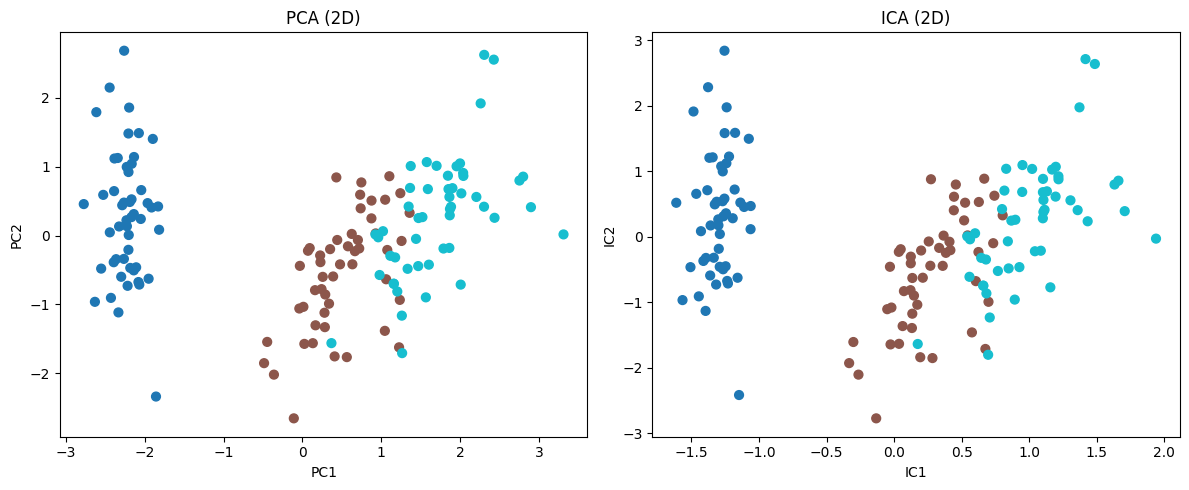

In [ ]:
# ============================================
# Comparación con PCA (2 componentes)
# ============================================
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_scaled)

fig, axes = plt.subplots(1,2, figsize=(12,5))

axes[0].scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap="tab10", s=40)
axes[0].set_title("PCA (2D)")
axes[0].set_xlabel("PC1"); axes[0].set_ylabel("PC2")

axes[1].scatter(X_ica2[:,0], X_ica2[:,1], c=y, cmap="tab10", s=40)
axes[1].set_title("ICA (2D)")
axes[1].set_xlabel("IC1"); axes[1].set_ylabel("IC2")

plt.tight_layout()
plt.show()


## Interpretación
- En este ejemplo con **Iris**, tanto PCA como ICA reducen a 2D.  
- **PCA** busca capturar la máxima varianza: los ejes reflejan combinaciones de características con más información global.  
- **ICA** busca maximizar la independencia: los ejes pueden resaltar combinaciones distintas, útiles si las variables contienen **mezclas ocultas**.  

👉 Aunque en Iris los resultados se parecen a PCA, en datos de **señales o mezclas** la diferencia es crucial:  
- PCA ≈ comprimir datos.  
- ICA ≈ separar fuentes.


# 3.6. Reglas de asociación

## ¿Qué son?
Las **reglas de asociación** buscan descubrir **relaciones frecuentes entre ítems** en grandes conjuntos de datos.  
Son muy usadas en **minería de datos** para entender patrones de compra, navegación o comportamiento.

Ejemplo clásico:
- Si un cliente compra **pan**, hay un 70% de probabilidad de que también compre **mantequilla**.

---

## Conceptos clave:

- **Soporte (support):** frecuencia relativa de un conjunto de ítems en el dataset.  
  $$
  support(A) = \frac{\text{transacciones con A}}{\text{total de transacciones}}
  $$

- **Confianza (confidence):** probabilidad de que ocurra B dado que ocurrió A.  
  $$
  confidence(A \Rightarrow B) = \frac{support(A \cup B)}{support(A)}
  $$

- **Lift:** mide la importancia de la regla comparando con independencia.  
  $$
  lift(A \Rightarrow B) = \frac{confidence(A \Rightarrow B)}{support(B)}
  $$
  - Si $lift > 1$, A y B ocurren juntos **más de lo esperado al azar**.
  

---

## Algoritmos comunes:
- **Apriori:** busca ítems frecuentes combinando conjuntos de forma iterativa.  
- **FP-Growth:** optimización más rápida para grandes volúmenes.  

---


In [ ]:
# ============================================
# Ejemplo práctico: reglas de asociación
# ============================================
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Dataset de ejemplo: transacciones tipo "supermercado"
dataset = [
    ["pan", "leche", "mantequilla"],
    ["pan", "leche"],
    ["leche", "mantequilla"],
    ["pan", "cerveza"],
    ["pan", "leche", "mantequilla", "cerveza"],
]

# Convertir a one-hot encoding
df = pd.DataFrame([{item: (item in trans) for item in set(sum(dataset, []))} for trans in dataset])
print("Dataset en formato one-hot:")
display(df)

# ============================================
# 1) Conjuntos frecuentes con Apriori
# ============================================
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
print("Conjuntos frecuentes:")
display(frequent_itemsets)

# ============================================
# 2) Generación de reglas de asociación
# ============================================
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("Reglas de asociación:")
display(rules[["antecedents", "consequents", "support", "confidence", "lift"]])


Dataset en formato one-hot:


,pan,cerveza,mantequilla,leche
0,True,False,True,True
1,True,False,False,True
2,False,False,True,True
3,True,True,False,False
4,True,True,True,True


Conjuntos frecuentes:


,support,itemsets
0,0.8,(pan)
1,0.4,(cerveza)
2,0.6,(mantequilla)
3,0.8,(leche)
4,0.4,"(pan, cerveza)"
5,0.4,"(pan, mantequilla)"
6,0.6,"(pan, leche)"
7,0.6,"(mantequilla, leche)"
8,0.4,"(pan, mantequilla, leche)"


Reglas de asociación:


,antecedents,consequents,support,confidence,lift
0,(pan),(cerveza),0.4,0.500000,1.250000
1,(cerveza),(pan),0.4,1.000000,1.250000
2,(mantequilla),(leche),0.6,1.000000,1.250000
3,(leche),(mantequilla),0.6,0.750000,1.250000
4,"(pan, mantequilla)",(leche),0.4,1.000000,1.250000
5,"(pan, leche)",(mantequilla),0.4,0.666667,1.111111
6,(mantequilla),"(pan, leche)",0.4,0.666667,1.111111
7,(leche),"(pan, mantequilla)",0.4,0.500000,1.250000


# Interpretación de resultados — Reglas de Asociación

## 1. Dataset en formato *one-hot*
La tabla muestra **5 transacciones** (filas) y **4 productos** (columnas: pan, cerveza, mantequilla, leche).  
- El valor **True** indica que el producto estuvo presente en la transacción.  
- Ejemplo: en la transacción 0 el cliente compró *pan, mantequilla y leche*, pero no *cerveza*.  

---

## 2. Conjuntos frecuentes (*frequent itemsets*)
El algoritmo Apriori identificó combinaciones de productos que aparecen con una frecuencia significativa (soporte ≥ 30%).  

Algunos ejemplos:  
- `(pan)` → soporte = **0.8** → aparece en 4 de las 5 transacciones.  
- `(mantequilla, leche)` → soporte = **0.6** → aparece en 3 de las 5 transacciones.  
- `(pan, mantequilla, leche)` → soporte = **0.4** → aparece en 2 de las 5 transacciones.  

👉 Estos valores indican **qué tan comunes son los productos o combinaciones** en el dataset.  

---

## 3. Reglas de asociación
Las reglas encontradas muestran relaciones entre productos. Cada regla se interpreta con:  
- **Support (soporte):** frecuencia relativa de la combinación completa.  
- **Confidence (confianza):** probabilidad de que ocurra el consecuente dado el antecedente.  
- **Lift:** compara esa probabilidad con lo esperado al azar ( > 1 = relación positiva).  

Ejemplos concretos:  

1. **{pan} → {cerveza}**  
   - *Support = 0.4*: pan y cerveza aparecen juntos en el 40% de las transacciones.  
   - *Confidence = 0.5*: la mitad de los que compran pan también compran cerveza.  
   - *Lift = 1.25*: comprar pan aumenta en 25% la probabilidad de comprar cerveza.  

2. **{mantequilla} → {leche}**  
   - *Support = 0.6*: se da en el 60% de las transacciones.  
   - *Confidence = 1.0*: todos los que compran mantequilla también compran leche.  
   - *Lift = 1.25*: relación más fuerte de lo esperado por azar.  

3. **{pan, mantequilla} → {leche}**  
   - *Confidence = 1.0*: siempre que se compra pan y mantequilla juntos, también se compra leche.  
   - Esto sugiere un **patrón fuerte**: el trío pan–mantequilla–leche es común.  

---

## 4. Conclusión
- Los productos **mantequilla y leche** tienen la relación más fuerte (confianza = 100%).  
- El **pan** es el producto más frecuente (alto soporte), y se asocia con leche y mantequilla.  
- Como todas las reglas tienen **lift > 1**, las asociaciones encontradas son más fuertes de lo que se esperaría por azar.  


# 📚 Lecturas recomendadas — Aprendizaje No Supervisado

### 1. Hands-On Unsupervised Learning Using Python  
**Autor:** Ankur Patel  
- Libro práctico con código en Python.  
- Casos de clustering, reducción de dimensionalidad y aplicaciones reales.  
- **Vista online (O’Reilly):** [Leer aquí](http://103.203.175.90:81/fdScript/RootOfEBooks/E%20Book%20collection%20-%202023%20-%20G/CSE%20%20IT%20AIDS%20ML/Hands_On_Unsupervised_Learning_Using_Python_How_to_Build_Applied.pdf)  

---

### 2. Discovering Knowledge in Data: An Introduction to Data Mining  
**Autor:** Daniel T. Larose  
- Explicación accesible de técnicas de minería de datos.  
- Útil para principiantes y estudiantes.  
- **Vista online:** [O’Reilly](https://doc.lagout.org/science/0_Computer%20Science/4_Theory%20of%20Computation/Data%20Mining/Discovering%20Knowledge%20In%20Data%20An%20Introduction%20to%20Data%20Mining.pdf)  

---

### 3. Unsupervised Learning Algorithms  
**Autor:** K. Aydin  
- Libro de Springer sobre algoritmos de aprendizaje no supervisado.  
- Teórico y aplicado, con comparativas entre métodos.  
- **PDF (SpringerLink, acceso institucional):** [Ver aquí](https://link.springer.com/book/10.1007/978-3-319-24211-8)  




https://cienciadedatos.net/documentos/35_principal_component_analysis

https://umap-learn.readthedocs.io/en/latest/

https://medium.com/data-science/t-sne-clearly-explained-d84c537f53a